# EE 123 Lab 1 - Basic Python and DTFT

### General Jupyter Notebook Usage Instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `Shift-Enter`
- To add a new cell, either select `Insert->Insert New Cell Below` or type `b` key after select a cell
- You can change the cell mode from code to text in the pulldown menu or entering `m`. Use `Markdown` for text
- Use `y` to change back to code mode.
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `File->Save and Checkpoint` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell` or type `z` key
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial `python_tutorial.ipynb`.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `Insert->Insert New Cell Below` or typing the `b` key after selecting a cell.

__Q0.__ What do you add after a function to get the help window?

__A0. You add a "?" after the function name__

__Q1.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A1. np and plt__



__Q2.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print(x)

In [3]:
import numpy as np
x = np.array([1,2,3,4,5,6])
y = x[0:4]
y[0] = 7
print(x)


[7 2 3 4 5 6]


__Q3.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [5]:
# A3. Your code here:

print("[5 4 3 2 1 0 1 2 3 4]")

[5 4 3 2 1 0 1 2 3 4]


__Q4.__ Write a code that prints out an array of every other integer from 0 to 4

In [9]:
# A4. Your code here:

print(list(range(0,5,2)))
    

[0, 2, 4]


__Q5.__ Generate the same plot as in the following figure inline:
    
<img style="float: left;" src="./tutorial_plot.jpg">


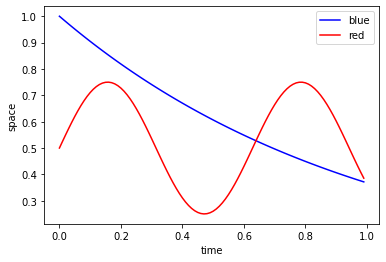

In [14]:
# A5. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.r_[:1:0.01] # if you don't specify a number before the colon, the starting index defaults to 0
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5

# Your code here:
plt.plot(x, y1, label='blue', color="blue")
plt.plot(x, y2, label='red', color="red")
plt.xlabel("time")
plt.ylabel("space")
plt.legend()


## DTFT Questions

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

In [4]:
N = 5
t = np.r_[-N:N+1]
a = np.ones(N)


### Solution for (a):

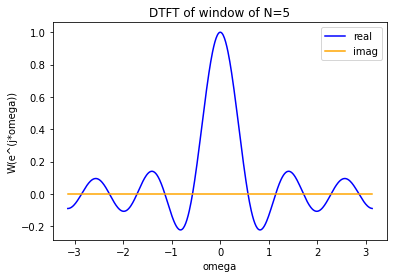

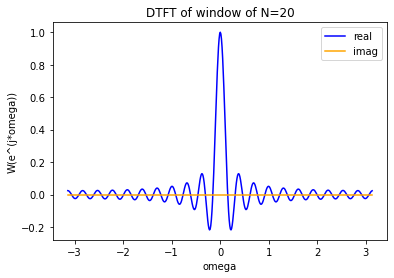

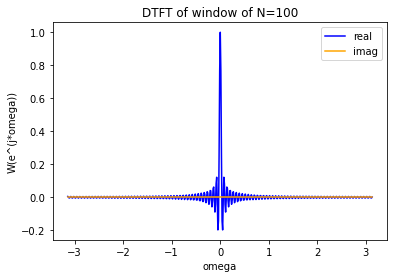

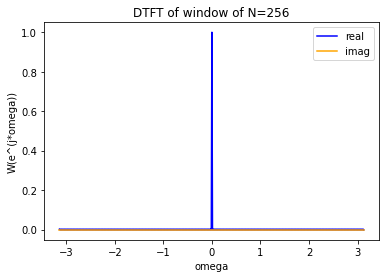

In [5]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100, 256]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = np.r_[-N:N+1:1]
    # create window function (w) using np.ones
    w = np.ones(2*N + 1)
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = np.arange(-np.pi, np.pi, 2*np.pi/512)
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = np.meshgrid(NN, Omega)
    
    # create DTFT matrix 
    #W_kn = e^(-j(2pik/N)n)
    DTFT = np.exp(-1j*n*omega)

    # evaluate DTFT
    W = DTFT @ w

    # normalize W such that W at omega=0 is 1
    W = W / (2 * N + 1)

    # create plots
    # plot both real and imag on the same figure ( use W.real and W.imag )
    # Your code here
    plt.figure()
    plt.plot(Omega, W.real, label='real', color='blue')
    plt.plot(Omega, W.imag, label='imag', color='orange')

    # End of your code
    
    # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
    # Your code here:
    plt.xlabel("omega")
    plt.ylabel("W(e^(j*omega))")
    plt.title(f"DTFT of window of N={N}")
    plt.legend()


Describe the effect of increasing $N$ on the DTFT of the rectangular window.

**Your answer here:**

Increasing N on the DTFT of the rectangular window as it approaches N, the number of samples in the DFT, it approaches a constant function that has an frequency response of just the normal dirac delta function. Up to that point, it is a sinc that slowly and surely horizontally shrinks. You can see in the case that the window function is 512 points wide, then we get the dirac delta because this is the DFT or the same as DFS on a repeated sequence of 512 points as 1 with period 512.


### Part (b): 

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

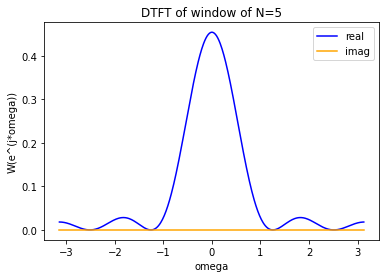

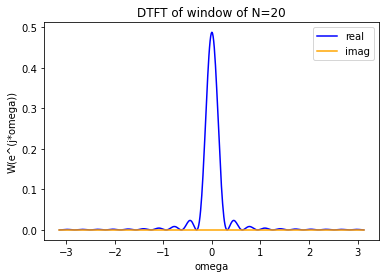

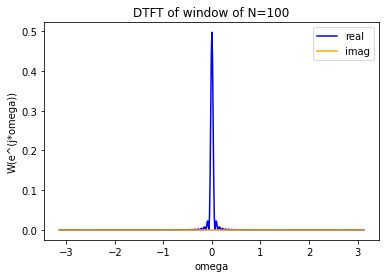

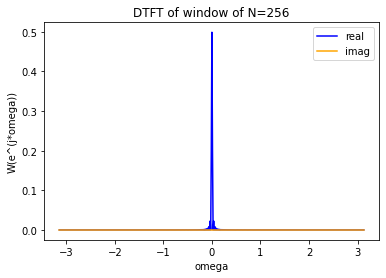

In [6]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100, 256]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = np.r_[-N:N+1:1]
    # create window function (w) 
    w = np.array([(1-abs(x)/(N)) for x in NN])

    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = np.arange(-np.pi, np.pi, 2*np.pi/512)
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = np.meshgrid(NN, Omega)
    
    
    # create DTFT matrix 
    DTFT = np.exp(-1j*n*omega)

    # evaluate DTFT
    W = DTFT @ w

    # normalize W such that W at omega=0 is 1
    W = W/(2*N+1)
    
    # create plots
    # plot both real and imag on the same figure ( use W.real and W.imag )
    # Your code here:
    plt.figure()
    plt.plot(Omega, W.real, label='real', color='blue')
    plt.plot(Omega, W.imag, label='imag', color='orange')

    # End of your code
    
    # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
    # Your code here:
    plt.xlabel("omega")
    plt.ylabel("W(e^(j*omega))")
    plt.title(f"DTFT of window of N={N}")
    plt.legend()



Describe the effect of increasing $N$ on the DTFT of the triangular window.

**Your answer here:**

Similar to the last problem, increasing N on the DTFT of the triangular window approaches the same dirac delta function in the first case. Also this time the function that the dft is sampling is the sinc^2 which is the fourier transform of the triangle function.



### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

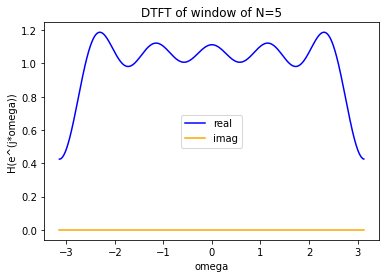

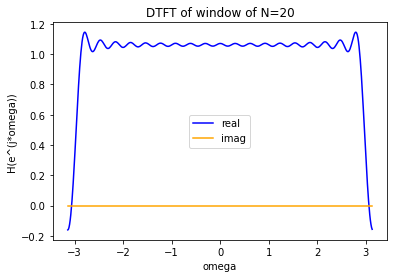

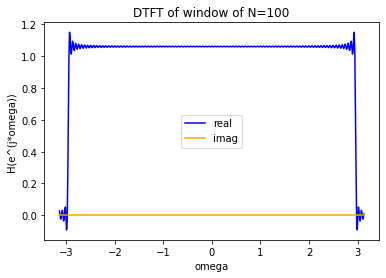

In [16]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = np.r_[-N:N+1:1]
    
    # create window function (w) 
    w = np.ones(N*2+1)
    # create windowed low-pass filter (h) 
    h = np.array([np.sinc(.3 * np.pi * x) for x in NN])
    
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = np.arange(-np.pi, np.pi, 2*np.pi/512)
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = np.meshgrid(NN, Omega)
    # create DTFT matrix 
    DTFT = np.exp(-1j * n*omega)

    # evaluate DTFT
    H = DTFT @ h

    # normalize H such that H at omega=0 is 1
    H = H
    
    
    # create plots
    # plot both real and imag on the same figure ( use H.real and H.imag )
    # Your code here:

    plt.figure()
    plt.plot(Omega, H.real, label='real', color='blue')
    plt.plot(Omega, H.imag, label='imag', color='orange')

    # End of your code
    
    # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
    # Your code here:
    plt.xlabel("omega")
    plt.ylabel("H(e^(j*omega))")
    plt.title(f"DTFT of window of N={N}")
    plt.legend()



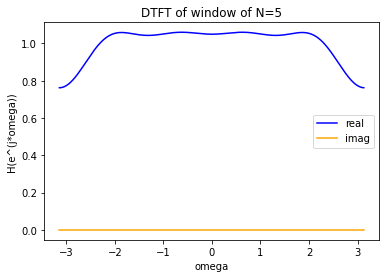

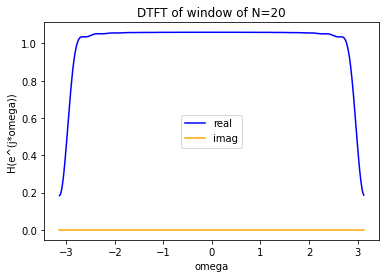

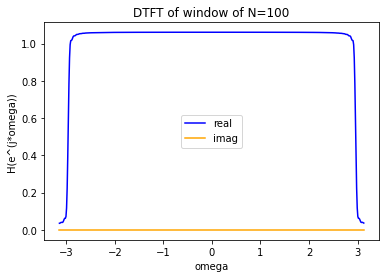

In [18]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = np.r_[-N:N+1:1]
    # create window function (w) 
    w = np.array([(1-abs(x)/(N)) for x in NN])
    # create windowed low-pass filter (h) 
    h = w * np.array([np.sinc(.3 * np.pi * x) for x in NN])
    
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = np.arange(-np.pi, np.pi, 2*np.pi/512)
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n, omega = np.meshgrid(NN, Omega)
    
    # create DTFT matrix 
    DTFT = np.exp(-1j * n*omega)

    # evaluate DTFT
    H = DTFT @ h

    # normalize H such that H at omega=0 is 1
    H = H
    
    
    # create plots
    # plot both real and imag on the same figure ( use H.real and H.imag )
    # Your code here:
    plt.figure()
    plt.plot(Omega, H.real, label='real', color='blue')
    plt.plot(Omega, H.imag, label='imag', color='orange')

    # End of your code
    
    # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
    # Your code here:
    plt.xlabel("omega")
    plt.ylabel("H(e^(j*omega))")
    plt.title(f"DTFT of window of N={N}")
    plt.legend()



Explain the difference.

**Your answer here:**

First, the impulse response to the lowpass filter with a cuttoff at .3 pi, is the $sinc(.3 \pi x)$ function. 

When we are truncating the input to the dtft, we are multiplying the inputs which are either rect or triangle with a sinc function. 

That means in frequency domain we are convolving the shapes of either a sinc with a square, or a $sinc^2$ with a square. The result from the $sinc^2$ that arises is more smooth as N increases than the convolution with the normal $sinc# because it has no subtractory values, and there exhibits less gibbs ringing.